# CSIT456 Lab 4: Classifying Two Moons by SVM


## Name: Mohammed Al-Shalchy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns


## About the data set
Let's consider a synthetic dataset in the shape of "two moons". Here, each sample has two pieces of information: 
* the *features*, denoted by $x_i$, which are just a two-dimensional coordinate and 
* a *target*, denoted by $y_i$, which is either 0 or 1. 

In [2]:
from sklearn.datasets import make_moons
# there are two features contained in X and the labels are contained in y
X,y = make_moons(n_samples=500,random_state=1,noise=0.3)

# X is a 500x2 numpy.ndarray containing the coordinates for each sample
# y is a 500x1 numpy.ndarray containing the class for each sample
print(type(X), type(y)) 
print(np.shape(X), np.shape(y))



<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(500, 2) (500,)


Text(0, 0.5, 'feature 2')

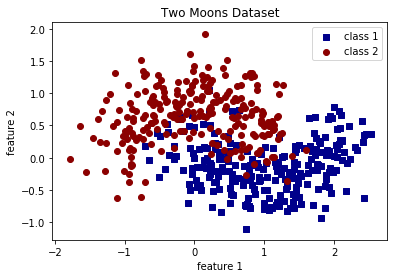

In [3]:
# Plot the data, color by class
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="DarkBlue", marker="s",label="class 1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="DarkRed", marker="o",label="class 2")
plt.legend()
plt.title('Two Moons Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

## Question 1 [5 points] Data Preparing

The data set is clean and scaled. **X** is the array of two features and **y** is the one of predictor variable. 


Split the data to train set (70%) and test set (30%) and allow the random selection. 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Question 2 [15 points] Applying Linear SVM
1. Create a linear SVM model called **svm_linear** and train it by the train set. 
2. Apply the test set to test the model and print the accurancy.

In [11]:
from sklearn import svm
#svm contains both classification and regression; svm.SVC for classification and svm,SVR for regression. 
#We're working with classification for today
svm_linear = svm.SVC(kernel= 'linear')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
svm_linear.score(X_test,y_test)

0.8533333333333334

### Plot the results
You could use the following code to indicate the split of SVM linear model.

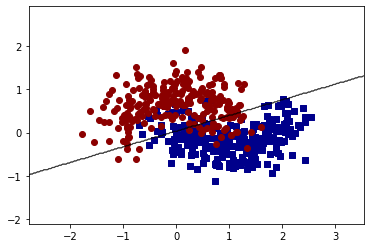

In [13]:

#Get the range of the features
x_min, x_max = X[:,0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1

#Create 200 values of the two features between the ranges above.
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))

#Given the 200 value pairs of the features, predict the classes using the model 
zz = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

#Draw the scatter plot to show the 'two moons' dataset
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="DarkBlue", marker="s",label="class 1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="DarkRed", marker="o",label="class 2")

#Plot the prediction made by the model using the contour plot 
plt.contour(xx, yy, zz, colors="black", alpha=1, linewidths=0.2) 


In [21]:
#plt.contourf(xx,yy,zz,2,alpha=0.2)

In [15]:
xx.shape

(200, 200)

## Question 3 [15 points] Applying SVM with Kernel Trick
1. Create a SVM model called **svm_kernel** and train it by the train set. 
2. Apply the test set to test the model and print the accurancy.

In [26]:
svm_kernel = svm.SVC(kernel = 'rbf')
svm_kernel.fit(X_train,y_train)

C:\Users\mrpow\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
svm_kernel.score(X_test,y_test)

0.8866666666666667

### Plot the results
You could use the following code to indicate the split of SVM model with kernel trick.

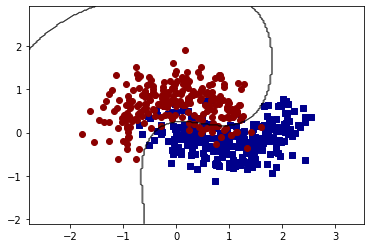

In [29]:
#Get the range of the features
x_min, x_max = X[:,0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1

#Create 200 values of the two features between the ranges above.
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))

#Given the 200 value pairs of the features, predict the classes using the model
zz = svm_kernel.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

#Draw the scatter plot to show the 'two moons' dataset
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="DarkBlue", marker="s",label="class 1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="DarkRed", marker="o",label="class 2")
plt.contour(xx, yy, zz, colors="black", alpha=1, linewidths=0.2) 

## Question 4 [15 points] Tuning Hyperparameter of SVM
1. Create 10 candidant values of the hyperparameter **C** and **gamma** in the range of:

  1) **C**: 0.0001 to 100 
  
  2) **gamma**: the value of **C**/number_of_samples_in_train_set
  
  
  
2. Apply Grid Search to **svm_kernel** with 10-fold cross validation and find the best values of **C** and **gamma**.


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'C':np.logspace(-4,3,20),
             'gamma':np.logspace(-4,3,20)/X_train.shape[0]}
grid = GridSearchCV(svm_kernel, param_grid=param_grid, cv=10)
grid.fit(X_train,y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.33572147e...
                         'gamma': array([2.85714286e-07, 6.67348991e-07, 1.55874137e-06, 3.64078567e-06,
       8.50386126e-06, 1.98626513e-05, 4.63936211e-05, 1.08362577e-04,
       2.53104797e-04, 5.91182309e-04, 1.38083721e-03, 3.22525112e-03,
       7.53328828e-03, 1.75956632e-02, 4.10985682e-02, 9.59948082e-02,
       2.24217134e-01, 5.23708775e-01, 1.22323783e+00, 2.85714286e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

In [42]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 0.08858667904100823, 'gamma': 1.2232378282055392}
0.88
